<a href="https://colab.research.google.com/github/MaLuisa7/Machine_Learning_Lessons/blob/main/TAREAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 

1. Crear, modificar o eliminar columnas
2. Filtrar registros
3. Crear subconjuntos de datos
4. Crear grupos de datos 

## 0. Preparación de datos

In [2]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    

In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns

In [4]:
# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
ticker = yf.Ticker('SPY')
end_date = '2023-01-23'
start_date = '2018-01-23'
sp500 = ticker.history(start=start_date,end=end_date)
print("Shape of SP 500 data is:", sp500.shape)
sp500.head(2)

Shape of SP 500 data is: (1258, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,0.0,0.0,0.0
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,0.0,0.0,0.0


In [5]:
sp500.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-01-19 00:00:00-05:00,389.359985,391.079987,387.260010,388.640015,86958900,0.0,0.0,0.0
2023-01-20 00:00:00-05:00,390.100006,396.040009,388.380005,395.880005,91544900,0.0,0.0,0.0


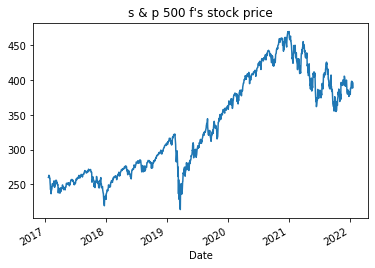

In [6]:
sp500['Close'].plot(title="s & p 500 f's stock price")

## 1. Crear, modificar o eliminar columnas

### Obtenemos retornos 

Info: [Calculate daily returns](https://towardsdatascience.com/calculate-and-plot-s-p-500-daily-returns-2ce359e014d6)

In [7]:
sp500['daily_return'] = (sp500['Close']/ sp500['Close'].shift(1)) -1
sp500.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,daily_return
Date,,,,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,0.0,0.0,0.0,NaN
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,0.0,0.0,0.0,-0.000388


### Por el momento, se descartan las columnas: Dividends	Stock Splits	Capital Gains

In [8]:
sp500.drop(columns = ['Dividends', 'Stock Splits', 'Capital Gains',], inplace = True)

In [9]:
sp500.head(2)

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,NaN
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,-0.000388


## 2. Filtrar datos

Filtraremos todo el mes de agosto del año pasado

In [10]:
sp500[(sp500.index >= '2022-08-01') & (sp500.index <'2022-09-01')]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2022-08-01 00:00:00-04:00,405.613581,409.836770,404.870063,407.219574,69997500,-0.002961
2022-08-02 00:00:00-04:00,405.583825,409.430294,403.303717,404.532990,63435400,-0.006597
2022-08-03 00:00:00-04:00,406.753613,412.087117,406.456218,410.867767,67820600,0.015659
2022-08-04 00:00:00-04:00,410.788433,411.502211,408.875122,410.590179,45656600,-0.000676
2022-08-05 00:00:00-04:00,406.119174,410.570356,406.059695,409.896240,56814900,-0.001690
2022-08-08 00:00:00-04:00,411.660855,414.010366,408.270402,409.420380,53886100,-0.001161
2022-08-09 00:00:00-04:00,408.657062,409.182480,406.674348,407.794586,44931800,-0.003971
2022-08-10 00:00:00-04:00,415.160361,416.508622,413.118168,416.359894,68665700,0.021004
2022-08-11 00:00:00-04:00,419.333964,421.277045,415.586637,416.359894,59489700,0.000000


Filtraremos aquellos días en los que el close fue mayor al open.

In [11]:
sp500[(sp500.Close > sp500.Open) ]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,NaN
2018-01-26 00:00:00-05:00,260.979323,263.164484,260.713057,263.118561,107743100,0.011578
2018-02-01 00:00:00-05:00,258.059664,259.886740,257.701579,258.527893,90102500,-0.001135
2018-02-06 00:00:00-05:00,238.659552,247.620541,237.521076,247.097198,355026800,0.019702
2018-02-09 00:00:00-05:00,239.449123,242.029075,232.214243,240.091827,283565300,0.015022
...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,0.007013
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,0.012648
2023-01-12 00:00:00-05:00,396.670013,398.489990,392.420013,396.959991,90157700,0.003641


## 3. Crear subconjuntos de datos

A continuación, separaremos el dataframe en tres subconjuntos, aquellos días en los que los retornos fueron mayores a cero, otro en donde los retornos fueron menores a 0 y finalmente, en donde los retornos fueron iguales a cero.

In [12]:
positive_returns = sp500.query("daily_return > 0")
negative_returns = sp500.query("daily_return < 0")
zero_returns =   sp500.query("daily_return == 0")

In [13]:
print("Shape of positive returns df is: ", positive_returns.shape)
positive_returns.head(2)

Shape of positive returns df is:  (679, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-25 00:00:00-05:00,260.896695,260.997676,259.280772,260.107086,84587300,0.000424
2018-01-26 00:00:00-05:00,260.979323,263.164484,260.713057,263.118561,107743100,0.011578


In [14]:
print("Shape of negative returns df is: ", negative_returns.shape)
negative_returns.head(2)

Shape of negative returns df is:  (575, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,-0.000388
2018-01-29 00:00:00-05:00,262.521843,262.980909,261.208919,261.374176,90118300,-0.006630


In [15]:
print("Shape of zero returns df is: ", zero_returns.shape)
zero_returns.head(2)

Shape of zero returns df is:  (3, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-05-08 00:00:00-04:00,245.662449,246.427539,244.417999,246.049622,67499200,0.0
2018-10-08 00:00:00-04:00,266.997060,268.085338,265.555353,267.713287,87742200,0.0


## 4. Crear grupos de datos

In [16]:
sp500['month'] =sp500.index.month

In [17]:
month_mean = sp500.groupby('month').mean()
month_mean

,Open,High,Low,Close,Volume,daily_return
month,,,,,,
1,341.552221,343.741626,338.978682,341.609282,9.037117e+07,0.000472
2,325.897307,328.312282,323.470597,325.891082,1.053835e+08,-0.000864
3,317.592474,320.831251,314.373422,317.753752,1.337301e+08,-0.000200
4,322.164536,324.215646,319.714849,321.948077,8.986392e+07,0.001304
5,318.287493,320.544002,315.803608,318.426053,8.883967e+07,0.000205
6,325.582062,327.326634,323.388632,325.396580,8.055543e+07,0.000331
7,330.268344,332.143912,328.616427,330.910764,6.360371e+07,0.002116
8,341.980189,343.599759,340.371579,342.126219,6.383250e+07,0.000671
9,340.726162,342.519833,338.065006,340.124166,7.932465e+07,-0.001487


In [18]:
month_mean['classification_daily_return'] = [ 1  if x>0 else 0 for x in  month_mean.daily_return ]
month_mean

,Open,High,Low,Close,Volume,daily_return,classification_daily_return
month,,,,,,,
1,341.552221,343.741626,338.978682,341.609282,9.037117e+07,0.000472,1
2,325.897307,328.312282,323.470597,325.891082,1.053835e+08,-0.000864,0
3,317.592474,320.831251,314.373422,317.753752,1.337301e+08,-0.000200,0
4,322.164536,324.215646,319.714849,321.948077,8.986392e+07,0.001304,1
5,318.287493,320.544002,315.803608,318.426053,8.883967e+07,0.000205,1
6,325.582062,327.326634,323.388632,325.396580,8.055543e+07,0.000331,1
7,330.268344,332.143912,328.616427,330.910764,6.360371e+07,0.002116,1
8,341.980189,343.599759,340.371579,342.126219,6.383250e+07,0.000671,1
9,340.726162,342.519833,338.065006,340.124166,7.932465e+07,-0.001487,0


In [19]:
month_mean.groupby('classification_daily_return').mean()

,Open,High,Low,Close,Volume,daily_return
classification_daily_return,,,,,,
0,334.216995,336.584715,331.484881,334.032203,1.019806e+08,-0.000720
1,332.538515,334.541798,330.365167,332.629519,7.982632e+07,0.000982


# Tarea 3: Clase 23 enero 2023

## Tarea 3 de salón de clases con valor de 2 puntos.

In [20]:
data =  list(sp500.daily_return.dropna())
data[:5]

[-0.0003882486781475736,
 0.0004237298580129778,
 0.011577826093026822,
 -0.006629653036945959,
 -0.010257207804725166]

### Media

In [21]:
data1 = list(sp500.daily_return.dropna())

In [22]:
def promedio(data):
  sum_data = 0 
  for item in data:
    sum_data = item + sum_data

  mean =  sum_data / len(data)
  return mean 
  

In [23]:
promedio(data1)

0.0004273644569590883

### Mediana

In [24]:
def mediana(data):
  data.sort()
  half =int( len(data)/2)
  if len(data)%2==0:
    median = (data[half -1] + data[half]) /2
  else:
    median =  data[half]
  return median


In [25]:
mediana( data1)

0.0007275762978127265

### Desviación Estandar

In [26]:
def standard_deviation(data):
  lst1 = []
  b  = 0 
  average = promedio(data)
  for item in data:
    a = (item - average)**2
    b = a + b
  c = b/len(data)
  d = np.sqrt(c)
  return d 

In [27]:
sp500.daily_return.dropna().describe()

count    1257.000000
mean        0.000427
std         0.013617
min        -0.109424
25%        -0.005229
50%         0.000728
75%         0.007150
max         0.090603
Name: daily_return, dtype: float64

### Comprueba  si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

* $H_0$: Los datos provienen de una distribución normal

* $H_1$: Los datos no provienen de una distribución normal

Se conoce que se rechaza $H_0$ si $pvalor < \alpha$

In [28]:
# from scipy.stats import shapiro
from scipy import stats 

def prueba_normalidad(data, valor_alfa):
  stat, pvalor = stats.shapiro(data)
  pvalor = round(pvalor,4)
  if pvalor < valor_alfa:
      return print('Se rechaza H0, los datos no provienen de una distribución normal ya que , p-valor< alfa = ', pvalor)
  else:
      return print('No se rechaza H0, los datos provienen de una distribución normal ya que , p-valor>alfa = ', pvalor)

prueba_normalidad(data1, 0.05)

Se rechaza H0, los datos no provienen de una distribución normal ya que , p-valor< alfa =  0.0


## Tarea 3 (8 puntos)

1. Calcula estadísticos descriptivos básicos para tus datos
2. Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
3. Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
4. Presenta tus resultados gráficamente 

In [29]:
sp500['classification_daily_return'] = [ 1  if x>0 else 0 for x in  sp500.daily_return ]
sp500.head(5)

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
Date,,,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,NaN,1,0
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,-0.000388,1,0
2018-01-25 00:00:00-05:00,260.896695,260.997676,259.280772,260.107086,84587300,0.000424,1,1
2018-01-26 00:00:00-05:00,260.979323,263.164484,260.713057,263.118561,107743100,0.011578,1,1
2018-01-29 00:00:00-05:00,262.521843,262.980909,261.208919,261.374176,90118300,-0.006630,1,0


In [30]:
sp500.tail(5)

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
Date,,,,,,,,
2023-01-13 00:00:00-05:00,393.619995,399.100006,393.339996,398.500000,63863400,0.003880,1,1
2023-01-17 00:00:00-05:00,398.480011,400.230011,397.059998,397.769989,62677300,-0.001832,1,0
2023-01-18 00:00:00-05:00,399.010010,400.119995,391.279999,391.489990,99632300,-0.015788,1,0
2023-01-19 00:00:00-05:00,389.359985,391.079987,387.260010,388.640015,86958900,-0.007280,1,0
2023-01-20 00:00:00-05:00,390.100006,396.040009,388.380005,395.880005,91544900,0.018629,1,1


#### 1.Estadísticos descriptivos del conjunto de datos 

In [31]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-01-23 00:00:00-05:00 to 2023-01-20 00:00:00-05:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Open                         1258 non-null   float64
 1   High                         1258 non-null   float64
 2   Low                          1258 non-null   float64
 3   Close                        1258 non-null   float64
 4   Volume                       1258 non-null   int64  
 5   daily_return                 1257 non-null   float64
 6   month                        1258 non-null   int64  
 7   classification_daily_return  1258 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 120.7 KB


In [32]:
sp500.describe()

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1257.000000,1258.000000,1258.000000
mean,333.066458,335.193010,330.709322,333.069051,8.714210e+07,0.000427,6.549285,0.539746
std,70.957683,71.315180,70.532270,70.973158,4.581893e+07,0.013617,3.426631,0.498616
min,218.810119,220.238863,209.288290,213.785507,2.027000e+07,-0.109424,1.000000,0.000000
25%,267.545125,268.803393,265.733650,267.661926,5.780208e+07,-0.005229,4.000000,0.000000
50%,316.465157,318.183913,315.290843,316.553268,7.577835e+07,0.000728,7.000000,1.000000
75%,398.662745,401.085755,394.952707,398.056412,1.020921e+08,0.007150,10.000000,1.000000
max,471.569592,472.317469,468.460014,470.083679,3.922207e+08,0.090603,12.000000,1.000000


#### 2. Matriz de correlaciones

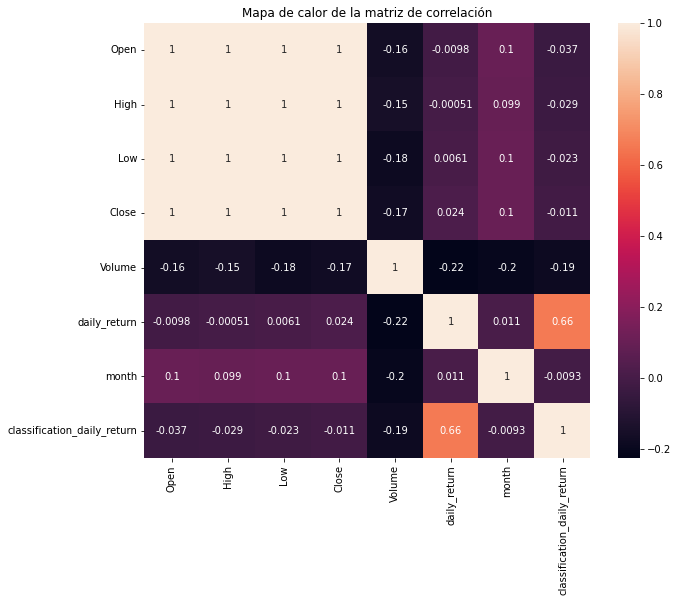

In [33]:
corr_sp500 = sp500.corr()
plt.figure(figsize=(10,8))
plt.title("Mapa de calor de la matriz de correlación")
sns.heatmap(data=corr_sp500,  annot=True)

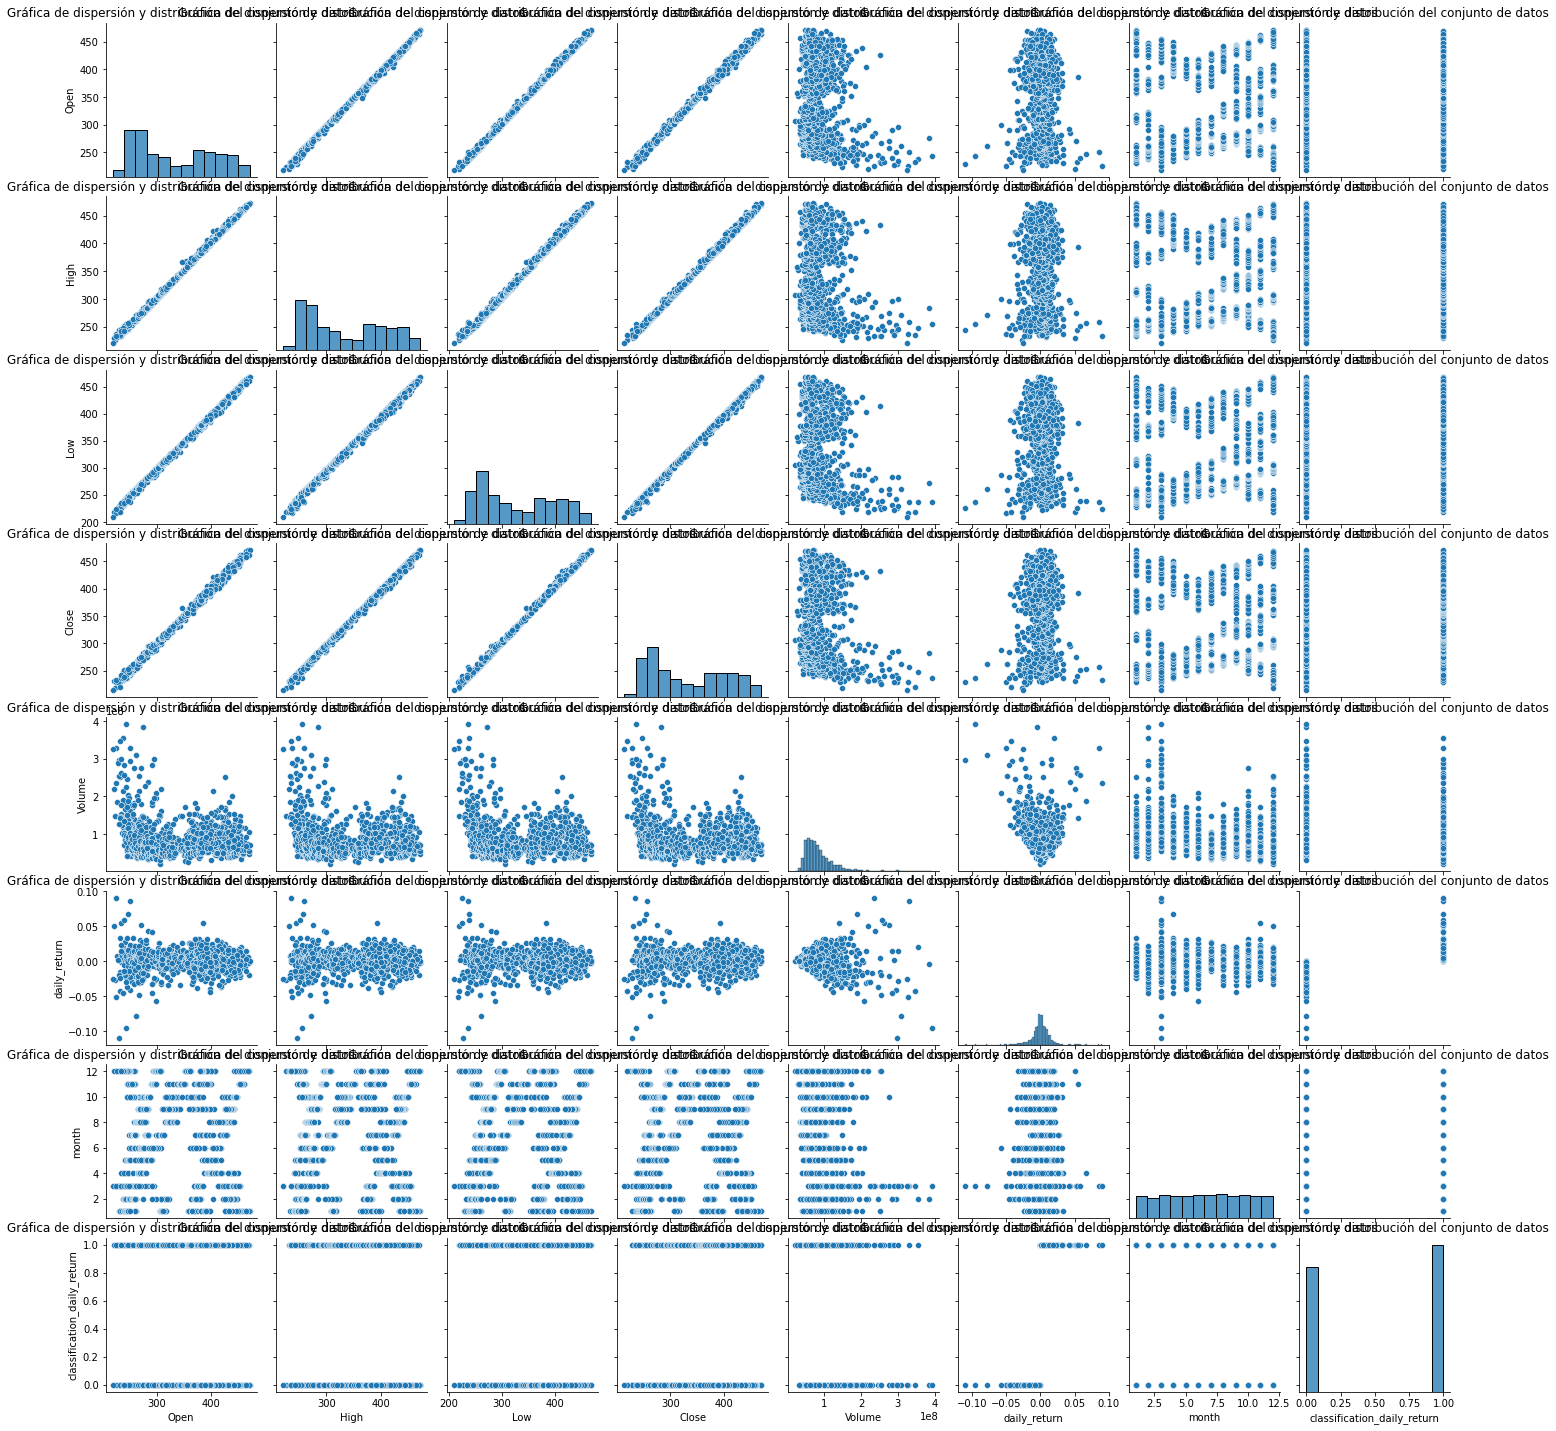

In [34]:
sns.pairplot(sp500).set(title= "Gráfica de dispersión y distribución del conjunto de datos")

* Clasificación del retorno, ya sea positivo (1) o negativo(0). 

* Interpretación:

  * Es posible interpretar que tanto las variables de: Open (Apertura), High (Alto), Low (Bajo) y Close (Cierre) se correlacionan positiva  y crecientemente.

  * La variable month (mes) no presenta correlación alguna con otras variables.
 
  * La variable Volumen tiene correlación negativa cercana a cero con todas las variables.

  * La variable daily returns (retornos diarios) presenta correlacion cercana a cero con casi todas las variables, menos con clasification daily returns o clasificación de retornos diarios, lo cual tiene sentido.

  * La variable clasification daily returns o clasificación de retornos diariospresenta correlacion cercana a cero con casi todas las variables, menos con retornos diarios, lo cual tiene sentido.



#### 3. Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación

Partiendo de la matriz de correlaciones y los gráficos mostrados, se observo que la variable volumen tiene una distribución exponencial. Por lo cual se plantea la siguiente hipótesis:

* Hipótesis nula $H_0$: El conjunto de datos proviene de una distrubución exponencial.  
* Hipótesis alternativa $H_1$ El conjunto de datos no proviene de una distrubución exponencial.  


In [35]:
import statsmodels.api as sm
ks, pval = sm.stats.diagnostic.lilliefors(sp500.Volume, dist = 'exp' )
print('pvalor es: ', pval)

pvalor es:  0.0009999999999998899


#### 4. Presenta tus resultados gráficamente.


[Text(0.5, 1.0, 'Histograma de la variable volumen')]

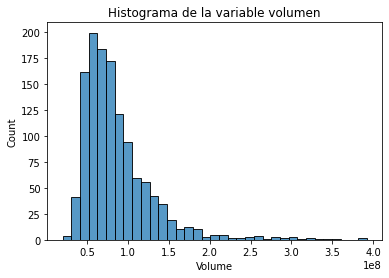

In [36]:
caja = int(np.sqrt(len(sp500)))
sns.histplot(sp500.Volume, bins =caja ).set(title= "Histograma de la variable volumen")

* Por tanto si pvalor es 0.000999 y tomando en cuenta un $\alpha$ = 0.05, se rechaza $H_0$ si pvalor es menor a $\alpha$, se observa que pvalor = 0.000999 < 0.05, por tanto se rechaza $H_0$ y los datos provienen de una distribución que no es la exponencial.

#### Extras: Otro tipo de gráficos que nos apoyan en el análisis descriptivo.

* Más gráficos

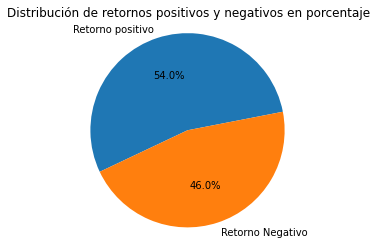

In [37]:
label = 'Retorno positivo', 'Retorno Negativo'
percent = [ 53.97, 46.02]

fig1, ax1 = plt.subplots()
ax1.pie(percent ,labels=label, autopct='%1.1f%%',
        shadow=False, startangle=11)
ax1.axis('equal')  
plt.title("Distribución de retornos positivos y negativos en porcentaje")
plt.show()

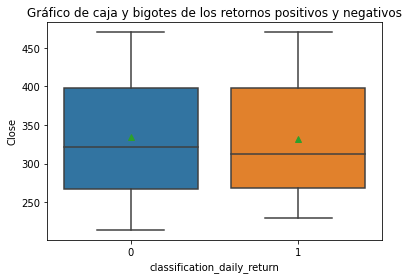

In [38]:
sns.boxplot(x='classification_daily_return',y='Close', data=sp500, showmeans=True)
plt.title("Gráfico de caja y bigotes de los retornos positivos y negativos")

plt.show()

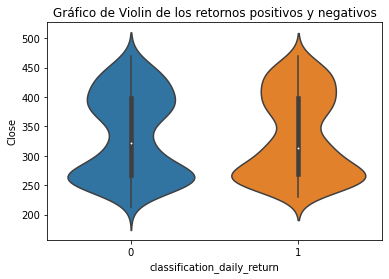

In [39]:
plt.title("Gráfico de Violin de los retornos positivos y negativos")

sns.violinplot(x='classification_daily_return', y='Close', data=sp500)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


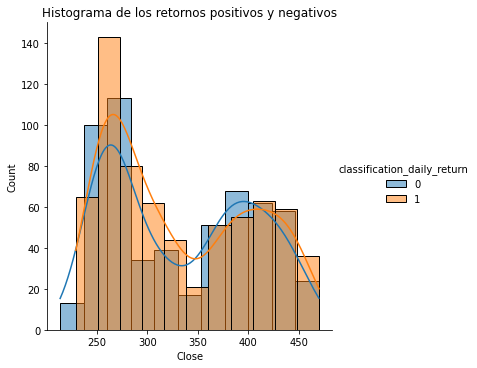

In [40]:
sns.FacetGrid(sp500, hue="classification_daily_return", size=5).map(sns.histplot, "Close",kde='True').add_legend().set(title= "Histograma de los retornos positivos y negativos")

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


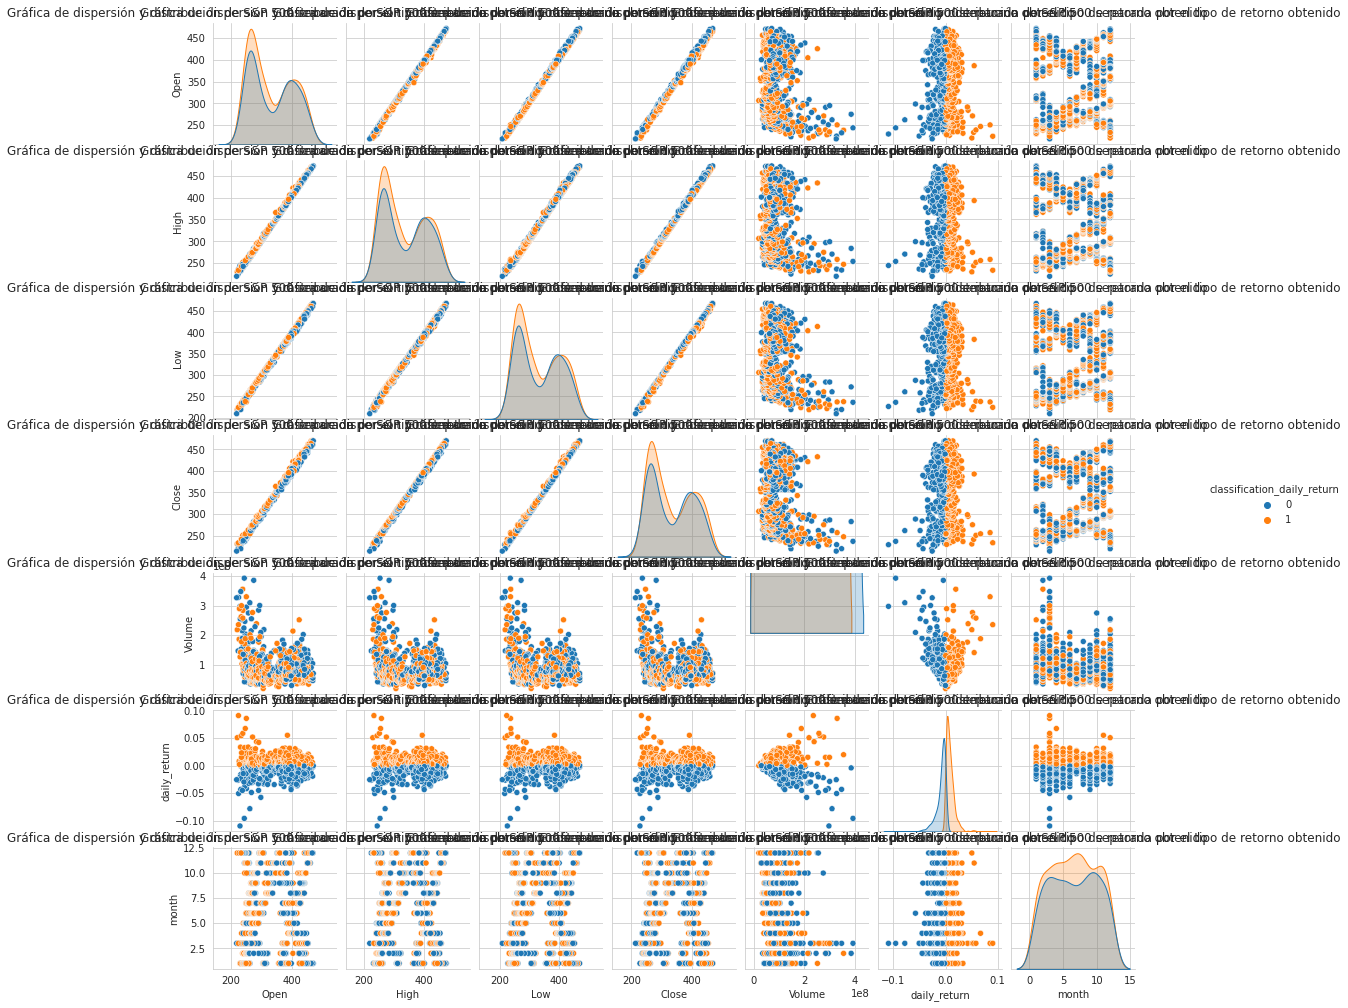

In [41]:
sns.set_style("whitegrid");
sns.pairplot(sp500,hue='classification_daily_return', size=2).set(title='Gráfica de dispersión y distribución de S&P 500 separada por el tipo de retorno obtenido')
plt.show()


# Clase 4: 30-01-2023 

## Tarea en clase: 2 puntos

Aplica algún método de filtro a tus datos mediante el uso de SelectKBest 

In [42]:
X = sp500.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]
y = sp500.loc[:,['classification_daily_return']]

In [43]:
from sklearn.feature_selection import SelectKBest, chi2
colnames = list(X.columns)
num_k = 1

for num_k in range(1, 5):
  select_class = SelectKBest(k=num_k, score_func=chi2)
  select_class.fit(X, y)
  X_new = select_class.transform(X)
  print("Número de características originalmente:", X.shape[1])
  print("Número de características después del método SelectKBest:", X_new.shape[1])
  print("Arreglo de característica(s) que tienen más importancia:",np.array(colnames)[select_class.get_support()] )# features[filter])
  nuevas_caracteristicas = pd.DataFrame(X_new)
  display(nuevas_caracteristicas.head())
  print(80*'_')

Número de características originalmente: 5
Número de características después del método SelectKBest: 1
Arreglo de característica(s) que tienen más importancia: ['Volume']


,0
0,97084700.0
1,134816100.0
2,84587300.0
3,107743100.0
4,90118300.0


________________________________________________________________________________
Número de características originalmente: 5
Número de características después del método SelectKBest: 2
Arreglo de característica(s) que tienen más importancia: ['Open' 'Volume']


,0,1
0,259.592910,97084700.0
1,260.768146,134816100.0
2,260.896695,84587300.0
3,260.979323,107743100.0
4,262.521843,90118300.0


________________________________________________________________________________
Número de características originalmente: 5
Número de características después del método SelectKBest: 3
Arreglo de característica(s) que tienen más importancia: ['Open' 'High' 'Volume']


,0,1,2
0,259.592910,260.400872,97084700.0
1,260.768146,261.392498,134816100.0
2,260.896695,260.997676,84587300.0
3,260.979323,263.164484,107743100.0
4,262.521843,262.980909,90118300.0


________________________________________________________________________________
Número de características originalmente: 5
Número de características después del método SelectKBest: 4
Arreglo de característica(s) que tienen más importancia: ['Open' 'High' 'Low' 'Volume']


,0,1,2,3
0,259.592910,260.400872,259.253206,97084700.0
1,260.768146,261.392498,258.766623,134816100.0
2,260.896695,260.997676,259.280772,84587300.0
3,260.979323,263.164484,260.713057,107743100.0
4,262.521843,262.980909,261.208919,90118300.0


________________________________________________________________________________


Se puede concluir que todas las variables resultaron ser TRUE y aportan a la variable de respuesta.

## Tarea 4 (8 puntos)


1. Aplica los modelos de selección de características cuidando los supuestos de cada modelo 

2. Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)

3. Con base en tu investigación, determina las características más relevantes de tu conjunto de datos

4. Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

In [44]:
sp500 = sp500.dropna()
sp500.head()

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
Date,,,,,,,,
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,-0.000388,1,0
2018-01-25 00:00:00-05:00,260.896695,260.997676,259.280772,260.107086,84587300,0.000424,1,1
2018-01-26 00:00:00-05:00,260.979323,263.164484,260.713057,263.118561,107743100,0.011578,1,1
2018-01-29 00:00:00-05:00,262.521843,262.980909,261.208919,261.374176,90118300,-0.006630,1,0
2018-01-30 00:00:00-05:00,259.464435,261.429226,258.197407,258.693207,131796400,-0.010257,1,0


### 1. Aplica los modelos de selección de características cuidando los supuestos de cada modelo

Dado que mi variable de respuesta es categorica, yo propongo aplicar dos métodos de selección de características:

1. Sequential Foward Selection (SFS) 
2. Entropia de los árboles de decisión.


#### Sequential Foward Selection (SFS)



In [45]:
import joblib

In [46]:
X = sp500.loc[:,['Open','High', 'Low', 'Close', 'Volume', 'daily_return', 'month']]
y = sp500.loc[:,['classification_daily_return']].values.ravel()

In [47]:
# !pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 50) 

sfs = SFS(estimator = clf_rf,         
          k_features = (1, 6),   
          forward = True,      
          scoring = 'accuracy',   
          cv=5)

sfs.fit(X,y)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=50),
                          k_features=(1, 6), scoring='accuracy')

In [48]:
print('La mejor exactitud fue %.2f' % sfs.k_score_)    
print('El mejor subconjunto fue:', sfs.k_feature_names_) 
             

La mejor exactitud fue 1.00
El mejor subconjunto fue: ('daily_return',)


Esto quiere decir que si yo utilizo el daily return del día anterior, entonces voy a predecir con una exactitud de 100% el retorno de hoy, intentaré de nuevo el ejercicio quitando esta característica.

In [49]:
clf_rf = RandomForestClassifier(n_estimators = 50) 

sfs = SFS(estimator = clf_rf,         
          k_features = (1, 6),   
          forward = True,      
          scoring = 'accuracy',   
          cv=5)

sfs.fit(X.drop(columns = 'daily_return'),y)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=50),
                          k_features=(1, 6), scoring='accuracy')

In [50]:
print('La mejor exactitud fue%.2f' % sfs.k_score_)    
print('EL mejor subconjunto es:', sfs.k_feature_names_) 
        

La mejor exactitud fue0.52
EL mejor subconjunto es: ('Volume',)


In [51]:
subconjuntos = sfs.subsets_
df_sfs = pd.DataFrame(subconjuntos).T
df_sfs.sort_values('avg_score', ascending=False,  inplace = True)
df_sfs

,feature_idx,cv_scores,avg_score,feature_names
1,"(4,)","[0.5436507936507936, 0.5436507936507936, 0.458...",0.520249,"(Volume,)"
6,"(0, 1, 2, 3, 4, 5)","[0.5515873015873016, 0.623015873015873, 0.4302...",0.504243,"(Open, High, Low, Close, Volume, month)"
2,"(4, 5)","[0.44841269841269843, 0.5119047619047619, 0.49...",0.50043,"(Volume, month)"
5,"(0, 2, 3, 4, 5)","[0.5198412698412699, 0.5992063492063492, 0.438...",0.489945,"(Open, Low, Close, Volume, month)"
3,"(2, 4, 5)","[0.5158730158730159, 0.5079365079365079, 0.438...",0.464523,"(Low, Volume, month)"
4,"(0, 2, 4, 5)","[0.46825396825396826, 0.5753968253968254, 0.37...",0.454148,"(Open, Low, Volume, month)"


#### Selección de características utilizando árboles de decisión

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

lim = int(len(X)*.70)
X_train = X.iloc[:lim,:]
X_test = X.iloc[lim:,:]
y_train = y[:lim]
y_test = y[lim:]

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support(), X_train.columns

(array([False, False, False, False, False,  True, False]),
 Index(['Open', 'High', 'Low', 'Close', 'Volume', 'daily_return', 'month'], dtype='object'))

Regresa verdadero para las características cuya importancia es mayor que la importancia media y Falso para el resto. En este caso para la característica de daily_return da verdadero.

Fuente: [Towards Data Science](https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f)

### 2. Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)

$$\text{Matriz de confusión}$$

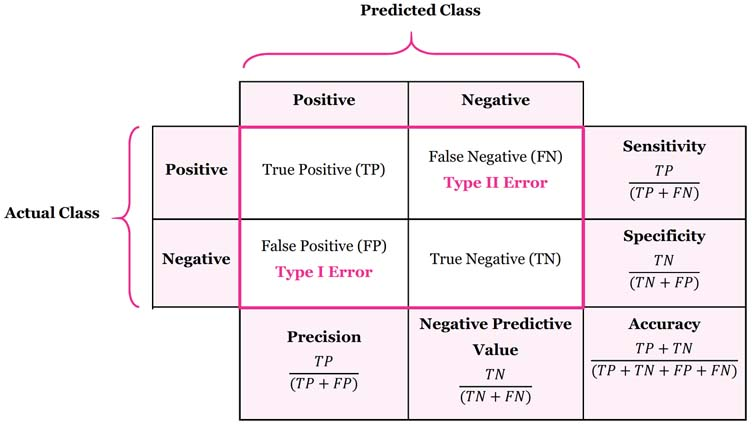

[Fuente de imagen: Matriz de Confusión](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

Esta imagen es una de mis favoritas para identificar métricas para calificar a los algoritmos de clasificación. Ya que parte de la matriz de confusión donde se agrupan los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos, que por medio del conteo de cada grupo es posible obtener la sensibilidad, especifidad, exactitud, presición y el valor predictivo negativo. A conitnuación se detalla cada uno.

* La sensibilidad es una medida de ejemplos positivos etiquetados como positivos por el clasificador. Se procura que sea alto. 

* La especificidad es una medida de ejemplos negativos etiquetados como negativos por el clasificador. Se procura que sea un valor alto.


* La precisión es la relación entre el número total de ejemplos positivos clasificados correctamente y el número total de ejemplos positivos predichos.  

* La precisión o exactitud es la proporción del número total de predicciones que son correctas.

* La puntuación F1 es un promedio ponderado de la recuperación (sensibilidad) y la precisión. 

Fuente: [Matriz de Confusion](https:/https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html/)

### 3. Con base en tu investigación, determina las características más relevantes de tu conjunto de datos 

y 

### 4. Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

Dada la naturaleza de mis datos, las características más importantes fueron el daily return, volumen y el mes. Esto nos da información para concluir que el daily return del día anterior es un buen indicador para saber si tendremos un retorno positivo o negativo el día de hoy. El volumen tambien es otro indicador que nos permite saber si el retorno será positivo y finalmente el mes es una característica que nos ayuda a saber si es un buen momento para invertir o no.

# **Tarea 5: Clase Jueves 9 de Febrero**

## Tarea en clase (2 puntos)

1. Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros.


2. Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste

### 1. Tarea en clase (2 puntos)


Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros.

Elegí el algoritmo de llamado en inglés "Afinitiy Propagation" ya que nunca lo había escuchado y es una oportunidad de aprendizaje.

Affinity propagation es un algoritmo de machine learning no supervisado que es paticularmente usado para problemas donde no se conoce el número optimo de clusters. 

Este método no supervisado se publicó en 2007 por Brendan Fre y Delbert Dueck.

Link: [Affinity Propagation](https:https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8//)

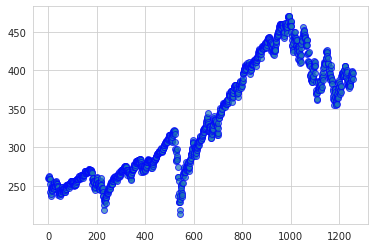

In [120]:
from sklearn.cluster import AffinityPropagation
x_data = range(0 , len(sp500))
y_data = sp500.Close
plt.scatter(x_data, y_data, alpha =0.7, edgecolors='b')

In [54]:
sp500.head()

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
Date,,,,,,,,
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,-0.000388,1,0
2018-01-25 00:00:00-05:00,260.896695,260.997676,259.280772,260.107086,84587300,0.000424,1,1
2018-01-26 00:00:00-05:00,260.979323,263.164484,260.713057,263.118561,107743100,0.011578,1,1
2018-01-29 00:00:00-05:00,262.521843,262.980909,261.208919,261.374176,90118300,-0.006630,1,0
2018-01-30 00:00:00-05:00,259.464435,261.429226,258.197407,258.693207,131796400,-0.010257,1,0


In [127]:
af = AffinityPropagation(preference=-8)
clustering = af.fit(sp500.Close.values.reshape(-1, 1))

In [128]:
num_clusters = pd.DataFrame( data = list( np. unique(clustering.labels_, return_counts=True) )).rename(index= {0 :'Número de clusters' , 1: 'Conteo de muestra en cada cluster'})#, columns = [, ])
num_clusters

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
Número de clusters,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
Conteo de muestra en cada cluster,11,14,18,22,11,13,31,18,18,13,...,10,7,11,13,12,10,15,9,14,8


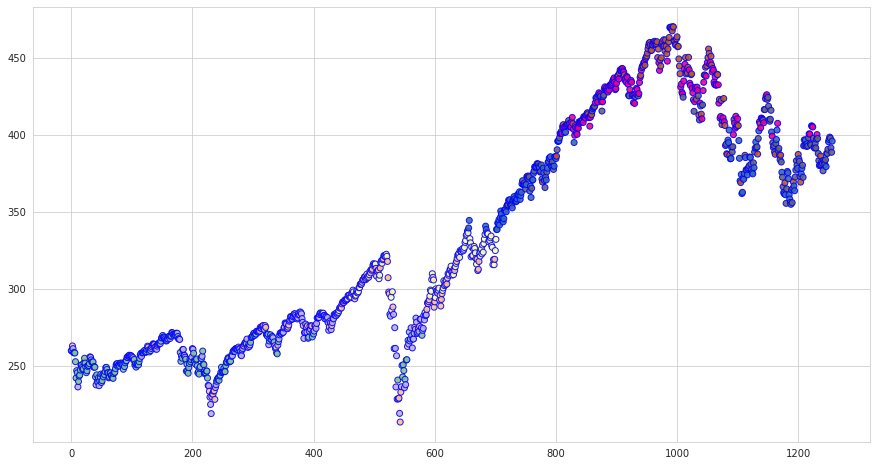

In [129]:
plt.figure(figsize=(15,8))
plt.scatter(x_data, y_data, c=clustering.labels_, cmap='Accent', alpha=0.9, edgecolors='b')

En este caso, cuando intentaba realizar el ejercicio con un valor de preference mayor a 10, todos los datos de Close los agrupaba en un solo cluster, por tanto, el valor de preference quedo en menos ocho , dando como resultado un número de clusters igual a ciento nueve.

### 2. Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste


El índice de Calinski-Harabasz (CH) es una de las medidas de evaluación de los algoritmos de agrupamiento. Se usa más comúnmente para evaluar la bondad de la división mediante un algoritmo de agrupación en clústeres de K-Means para una cantidad determinada de clústeres.


El índice de Calinski-Harabasz (también conocido como Criterio de relación de varianza) se calcula como una relación de la suma de la dispersión entre grupos y la suma de la dispersión dentro de los grupos para todos los grupos (donde la dispersión es la suma de las distancias al cuadrado).

 

¿Cómo interpreta el índice de Calinski-Harabasz?
Un CH alto significa una mejor agrupación ya que las observaciones en cada grupo están más juntas (más densas), mientras que los grupos en sí están más alejados entre sí (bien separados).

[Deciding number of Clusters](httpshttps://medium.com/mlearning-ai/deciding-number-of-clusters-using-gap-statistics-davies-bouldin-index-calinski-harabasz-index-2ce9acfb6118#:~:text=Davies%20Bouldin%20index%20is%20calculated,cluster%20distance%20to%20cluster%20size.://)


[Calinski-harabasz](https:https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python///)

In [131]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

In [145]:
X = sp500.Close.values.reshape(-1, 1) 

kmeans = KMeans(n_clusters=2, random_state=30)
labels = kmeans.fit_predict(X)
ch_index = calinski_harabasz_score(X, labels)
print(ch_index)


6334.219306619418


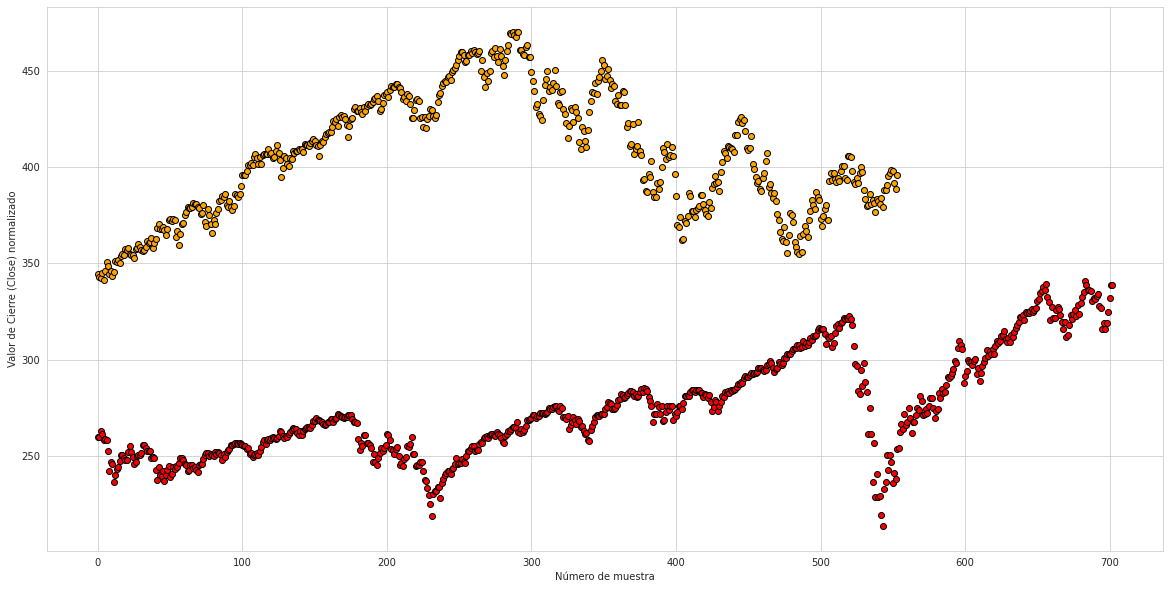

In [146]:
unique_labels = list(set(labels))
colors = ['red', 'orange', 'grey', 'blue']

plt.figure(figsize= (20,10))
for i in unique_labels:
    filtered_label = X[labels == i]
    plt.scatter( range(0,len(filtered_label[:,0])),
                filtered_label[:,0], 
                color = colors[i],
                edgecolor='k')

plt.xlabel('Número de muestra')
plt.ylabel('Valor de Cierre (Close) normalizado')
plt.show()

Es posible observar que el valor de cierre de la acción fue separada en 2 grupos, estos dos niveles representan cuando cerro por abajo de 341 y cuando cerro por arriba de 341. Es importante recordar que se procura que la acción cierre con valores altos para obtener mayor ganancia. 

## Tarea (8 puntos)

1. Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes

2. Elegir alguna métrica para determinar número de grupos, usarla y discutirla

3. Busca alguna revista científica que publique trabajos relacionados con el tuyo

4. Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía

5. Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

Desglose de puntos de la tarea.


1. Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes

y 

2. Elegir alguna métrica para determinar número de grupos, usarla y discutirla



999.8062256415866


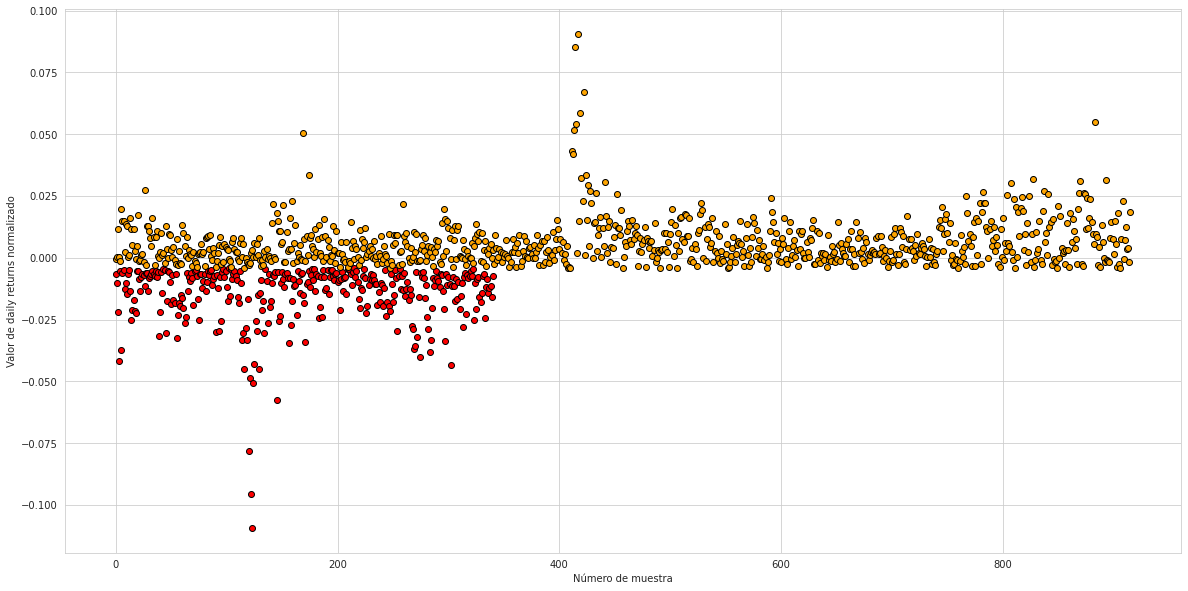

In [152]:
X = sp500.daily_return.values.reshape(-1, 1) 

kmeans = KMeans(n_clusters=2, random_state=30)
labels = kmeans.fit_predict(X)
ch_index = calinski_harabasz_score(X, labels)
print(ch_index)

unique_labels = list(set(labels))
colors = ['red', 'orange', 'grey', 'blue']

plt.figure(figsize= (20,10))
for i in unique_labels:
    filtered_label = X[labels == i]
    plt.scatter( range(0,len(filtered_label[:,0])),
                filtered_label[:,0], 
                color = colors[i],
                edgecolor='k')

plt.xlabel('Número de muestra')
plt.ylabel('Valor de daily returns normalizado')
plt.show()


Es posible observar claramente cuando los retornos fueron positivo y negativos, además de que la puntuación Calinski Harabasz es grande ,lo cual indica una buena separación entre los grupos.

3. Busca alguna revista científica que publique trabajos relacionados con el tuyo

**Journal of Economics, Finance and Administrative Science**

*La Revista de Ciencias Económicas, Financieras y Administrativas es el nuevo nombre de nuestros antiguos Cuadernos de Difusión. Por lo tanto, estamos incluyendo artículos escritos en ambos idiomas, inglés y español, ampliando nuestro alcance a una audiencia más amplia.

La Revista de Economía, Finanzas y Ciencias Administrativas tiene como objetivo proporcionar las investigaciones más relevantes y los desarrollos actuales en todos los campos de las ciencias administrativas en todo el mundo. Para cumplir con nuestro propósito, los artículos pasan por un riguroso proceso de evaluación y selección, de acuerdo con las convenciones editoriales internacionales.

La Universidad ESAN, con más de 50 años de experiencia en el campo de la educación superior y estudios de posgrado, desea aportar a la comunidad académica las investigaciones más destacadas. Agradecemos las sugerencias y contribuciones de nuestros lectores para ayudarnos a alcanzar nuestras metas.

[Journal of Economics, Finance and Administrative Science](https://www.elsevier.es/en-revista-journal-economics-finance-administrative-science-352-articulo-stock-market-index-prediction-using-S2077188616300245)